In [16]:
import pandas as pd


In [17]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/kaggle'

In [18]:
%cd /content/drive/My Drive/kaggle

/content/drive/My Drive/kaggle


In [19]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 1.38MB/s]


In [20]:
!unzip \*.zip && rm *.zip

Archive:  titanicdataset-traincsv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [22]:
train =pd.read_csv('/content/drive/My Drive/kaggle/train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


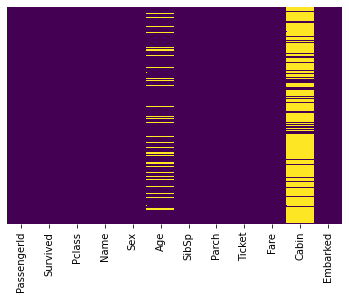

In [26]:
sns.heatmap(train.isnull(), yticklabels = False ,cbar = False,cmap = 'viridis')

In [27]:
sns.set_style('whitegrid')

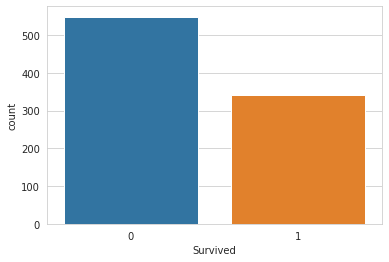

In [28]:
sns.countplot(x= 'Survived', data = train)

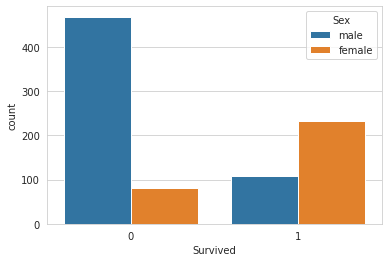

In [29]:
sns.countplot(x= 'Survived' , hue = 'Sex',data = train)

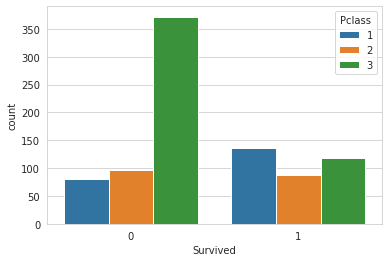

In [30]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


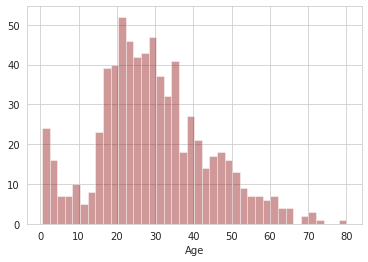

In [32]:
sns.distplot(train['Age'].dropna(),kde = False , color ='darkred',bins = 40)

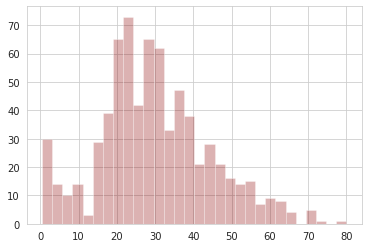

In [33]:
train['Age'].hist(bins = 30, color = 'darkred',alpha =0.3)

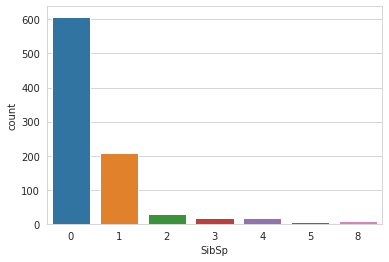

In [35]:
sns.countplot(x='SibSp' ,data = train)

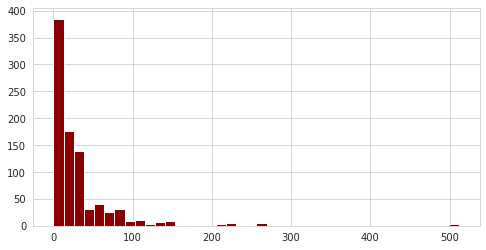

In [39]:
train['Fare'].hist(color ='darkred',bins =40 , figsize =(8,4))

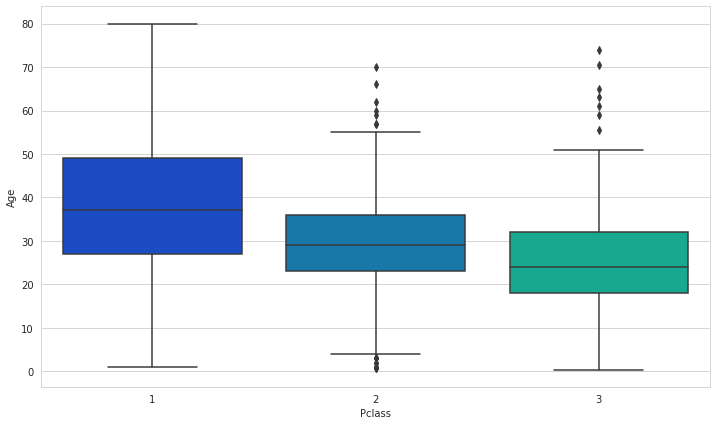

In [42]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass' ,y ='Age',data = train , palette = 'winter')

In [43]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else :
    return Age

In [44]:
train['Age'] = train[['Age','Pclass']].apply(impute_age , axis = 1)

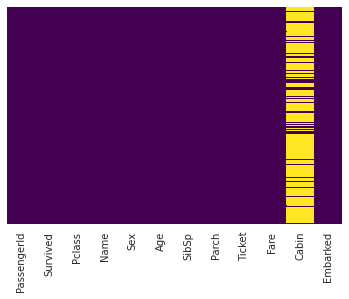

In [47]:
sns.heatmap(train.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')

In [53]:
train.drop('Cabin' ,axis =1, inplace = True)

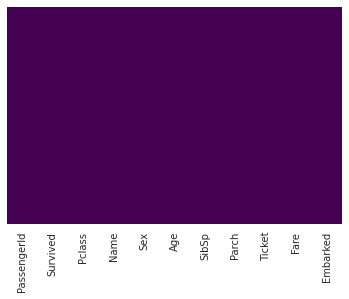

In [54]:
sns.heatmap(train.isnull() , yticklabels = False , cbar = False , cmap = 'viridis')

In [55]:
pd.get_dummies(train['Embarked'] , drop_first =True ).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [56]:
sex = pd.get_dummies(train['Sex'] , drop_first =True )
embarked = pd.get_dummies(train['Embarked'] , drop_first =True )

In [58]:
train.drop(['Sex','Embarked','Name','Ticket'] , axis = 1 , inplace = True)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [60]:
train = pd.concat([train , sex ,embarked], axis = 1)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [62]:
train.drop('Survived' , axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [63]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
x_train , x_test , y_train , y_test = train_test_split(train.drop('Survived',axis = 1),
                                                       train['Survived'], test_size = 0.30,
                                                       random_state = 101)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(x_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions = logmodel.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
accuracy = confusion_matrix(y_test , predictions)

In [72]:
accuracy

array([[134,  20],
       [ 42,  72]])

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy = accuracy_score(y_test , predictions)

In [75]:
accuracy

0.7686567164179104

In [76]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])